<class 'numpy.ndarray'>
region_1 - Dominant frequency: 0.003
region_1 - Dominant period: 333.3333333333333
<class 'numpy.ndarray'>
region_2 - Dominant frequency: 0.006
region_2 - Dominant period: 166.66666666666666
<class 'numpy.ndarray'>
region_3 - Dominant frequency: 0.011
region_3 - Dominant period: 90.90909090909092


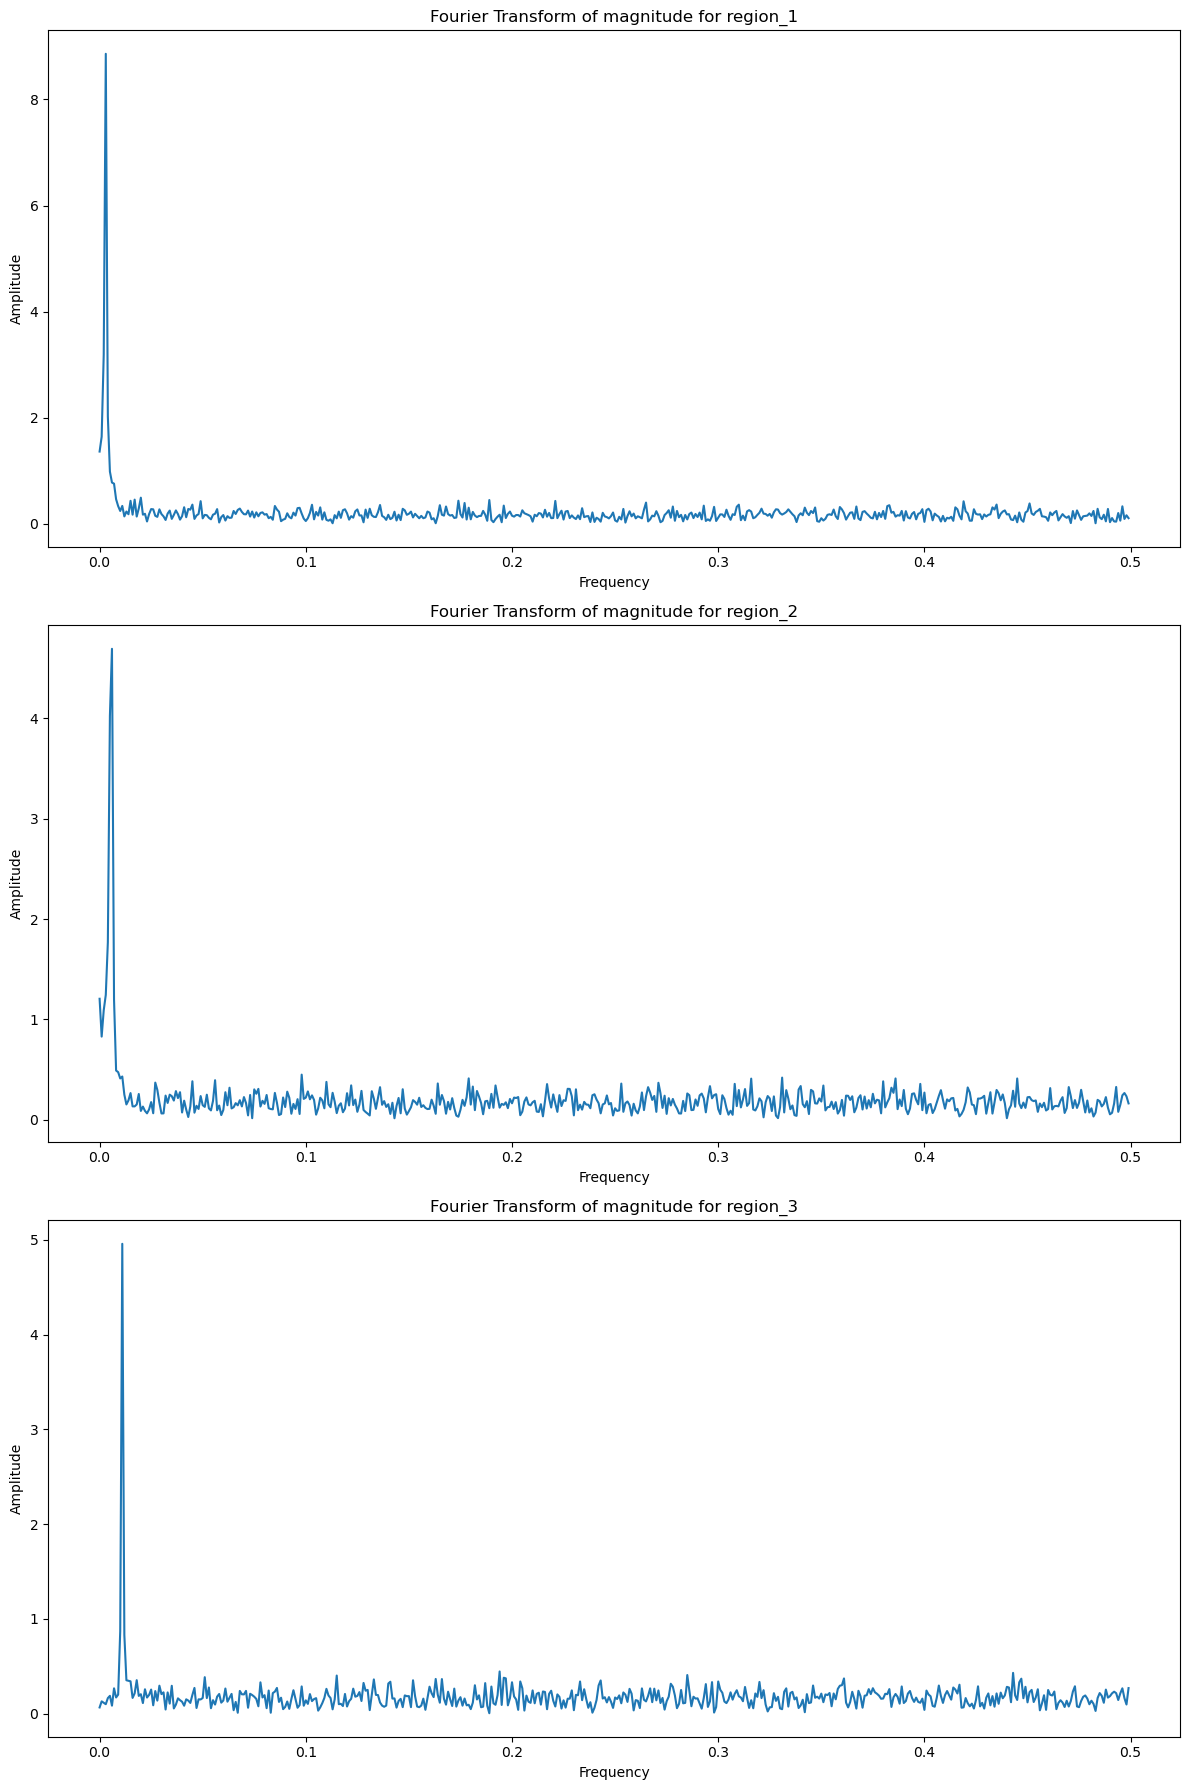

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Example earthquake data for multiple regions (this should be replaced with your actual earthquake data)
np.random.seed(42)
n = 1000  # Number of data points
time = np.arange(n)
# Simulated data for three regions with different seasonal patterns and noise
region_1 = 10 * np.sin(2 * np.pi * time / 365) + np.random.normal(scale=3, size=n)
region_2 = 7 * np.sin(2 * np.pi * time / 180) + np.random.normal(scale=3, size=n)
region_3 = 5 * np.sin(2 * np.pi * time / 90) + np.random.normal(scale=3, size=n)

# Create a DataFrame
df = pd.DataFrame({
    'time': time,
    'region_1': region_1,
    'region_2': region_2,
    'region_3': region_3
})

# Function to apply FFT and plot results for each region
def apply_fft_and_plot_subplots(df, column_name):
    regions = df.columns[1:]  # Exclude 'time' column

    fig, axes = plt.subplots(len(regions), 1, figsize=(12, 6*len(regions)))

    for i, region in enumerate(regions):
        region_data = df[region]

        yf = fft(region_data.values)

        xf = fftfreq(len(region_data), 1)[:len(region_data)//2]
        print(type(xf))
        axes[i].plot(xf, 2.0/len(region_data) * np.abs(yf[:len(region_data)//2]))
        axes[i].set_title(f'Fourier Transform of {column_name} for {region}')
        axes[i].set_xlabel('Frequency')
        axes[i].set_ylabel('Amplitude')

        # Identify the dominant frequency
        dominant_freq = xf[np.argmax(2.0/len(region_data) * np.abs(yf[:len(region_data)//2]))]
        dominant_period = 1 / dominant_freq
        print(f"{region} - Dominant frequency: {dominant_freq}")
        print(f"{region} - Dominant period: {dominant_period}")

    plt.tight_layout()
    plt.show()

# Example usage: Apply FFT for each region in subplots
apply_fft_and_plot_subplots(df, 'magnitude')
